In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [42]:
superstore = pd.read_excel('Superstore.xlsx',index_col=[0])

In [43]:
superstore.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN,2297200.8603,NaN,NaN
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN,NaN,NaN,NaN
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN,Furniture,Office Supplies,Technology
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN,741999.7953,719047.032,836154.033
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN,NaN,NaN,NaN


In [44]:
superstore.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24'],inplace=True)

In [45]:
superstore.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

__Let's rename the columns for more comprehensive names__

In [46]:
superstore.rename(columns={'Order ID':'Order_ID', 'Order Date':'Order_Date', 'Ship Date':'Ship_Date', 'Ship Mode':'Ship_Mode',
                            'Customer ID':'Customer_ID','Customer Name':'Customer_Name',  'Postal Code':'Postal_Code','Product ID':'Product_ID', 'Product Name':'Product_Name'},inplace=True)

In [47]:
superstore.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code',
       'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Let's look for Nan values

In [48]:
superstore[superstore.isna().any(axis=1)]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,


__No Nan values found__

Let's look for duplicates

In [49]:
superstore[superstore.duplicated()]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2011-150119,2011-04-23,2011-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [50]:
superstore.drop_duplicates(keep='first',inplace=True)

In [51]:
superstore[superstore.duplicated()]

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,


Let's look for some statistics

In [52]:
superstore.describe()

,Order_Date,Ship_Date,Postal_Code,Sales,Quantity,Discount,Profit
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2013-04-30 21:06:30.153107200,2013-05-04 20:07:16.625637888,55191.576403,229.852846,3.789753,0.156188,28.660971
min,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.731000
50%,2013-06-27 00:00:00,2013-06-30 00:00:00,56560.000000,54.480000,3.000000,0.200000,8.671000
75%,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32065.074478,623.276074,2.225149,0.206457,234.271476


Let's visualize the sales and profit evolution (we use a groupby order date followed by a sum in order to see for every day's sales and profit as there are several sales by day)

In [53]:
plt.style.use('seaborn')

C:\Users\chimb\AppData\Local\Temp\ipykernel_25492\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='Order_Date'>

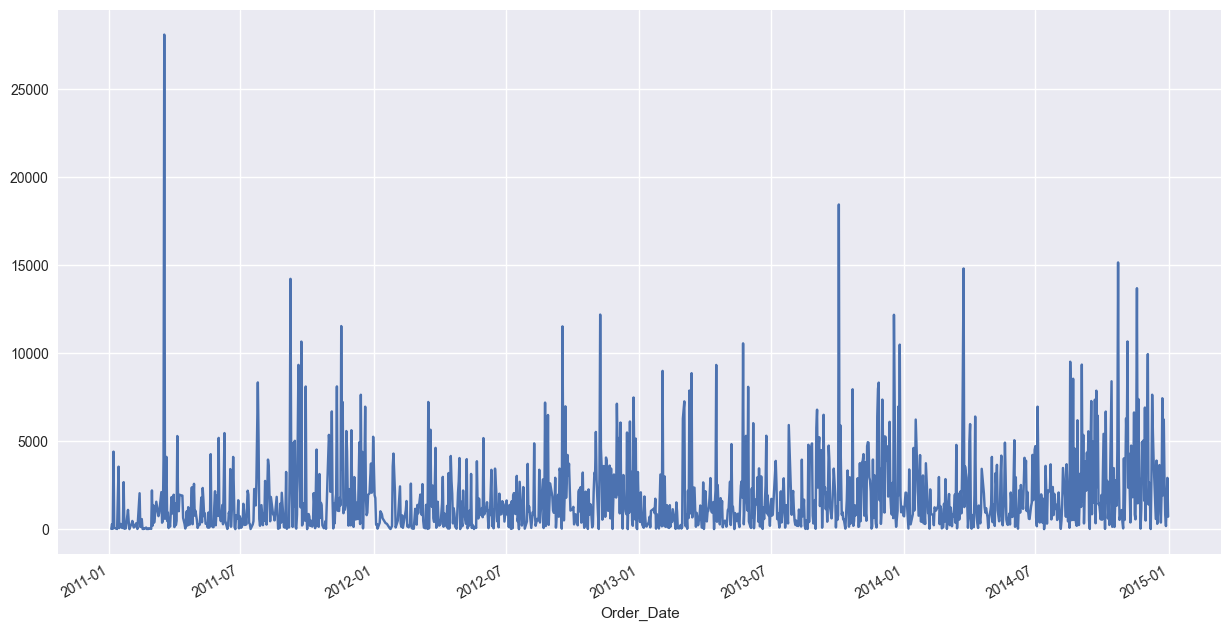

In [54]:
superstore.groupby(['Order_Date']).Sales.sum().plot(figsize=(15,8))

<Axes: xlabel='Order_Date'>

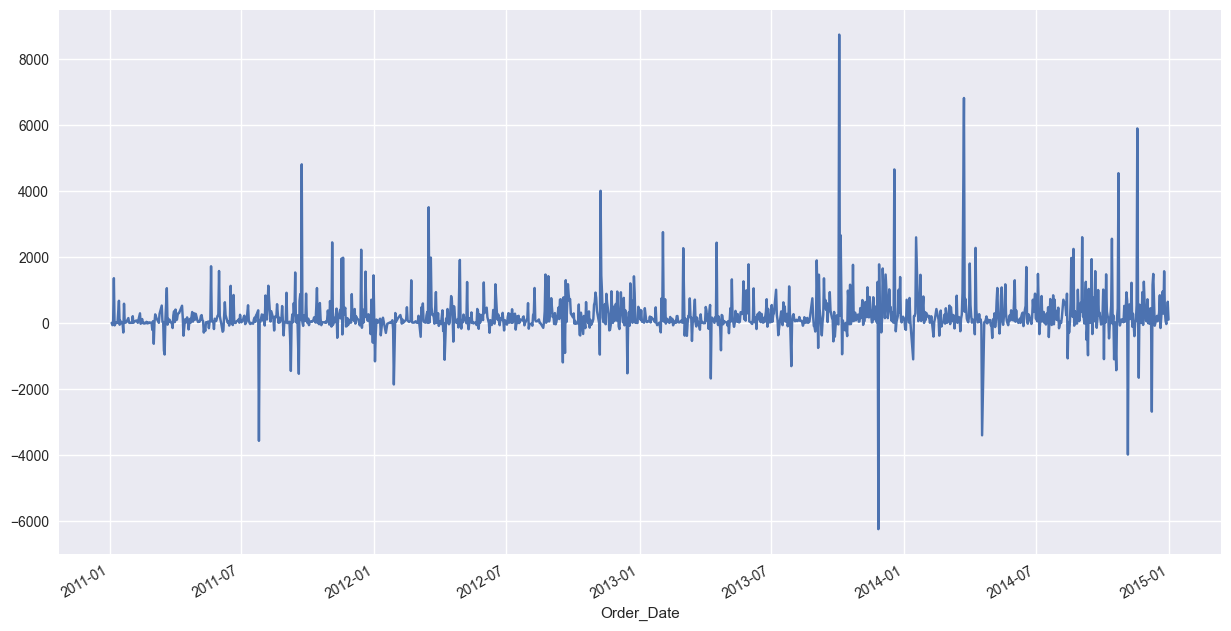

In [56]:
superstore.groupby(['Order_Date']).Profit.sum().plot(figsize=(15,8))

Let's __resample the date in order to display the average profit and sales every week so this sales and profit evolution is easier to read__

Text(0.5, 1.0, 'Profit evolution')

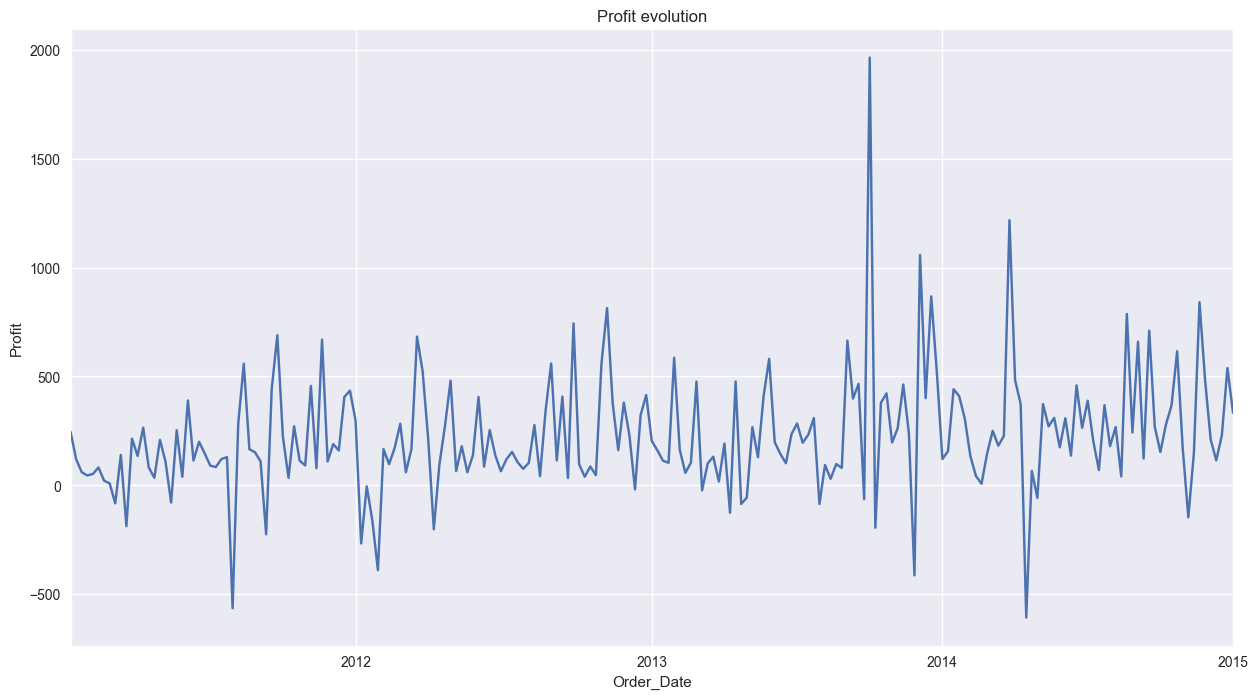

In [55]:
superstore.groupby(['Order_Date']).Profit.sum().resample('W',kind='period').mean().plot(figsize=(15,8))
plt.ylabel('Profit')
plt.title('Profit evolution')

Text(0.5, 1.0, 'Sales evolution')

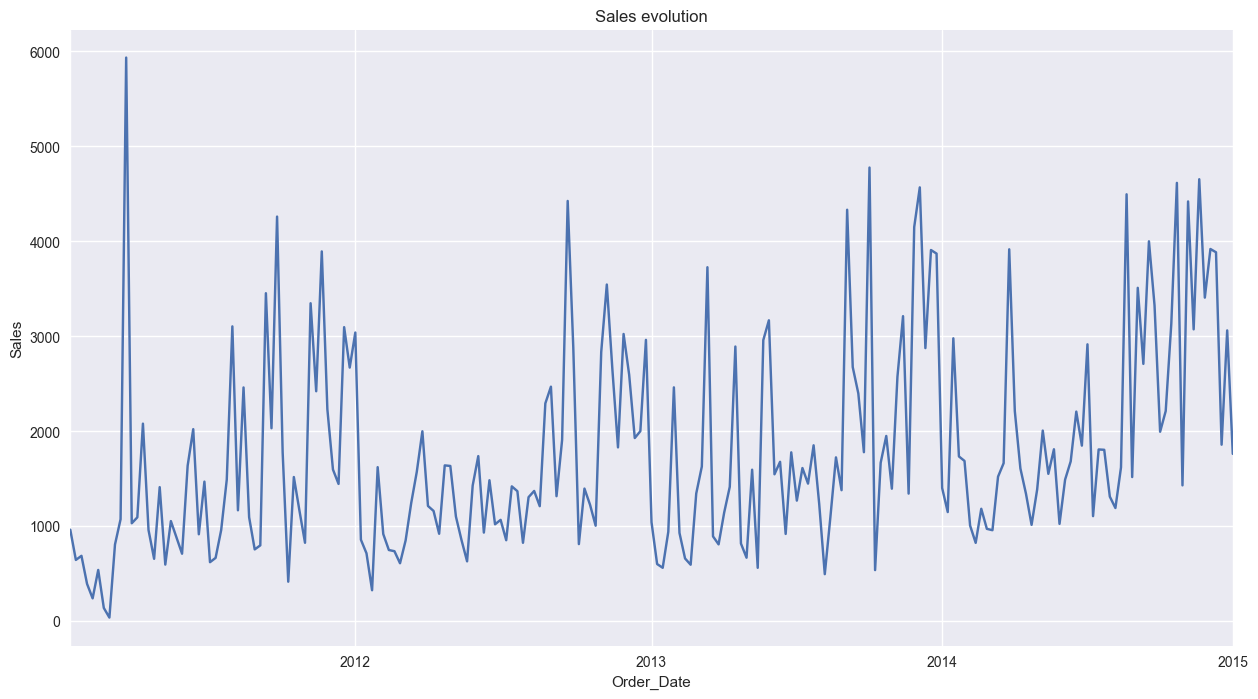

In [57]:
superstore.groupby(['Order_Date']).Sales.sum().resample('W',kind='period').mean().plot(figsize=(15,8))
plt.ylabel('Sales')
plt.title('Sales evolution')

__Let's look at the sales distribution__

Text(0.5, 1.0, 'Sales distribution')

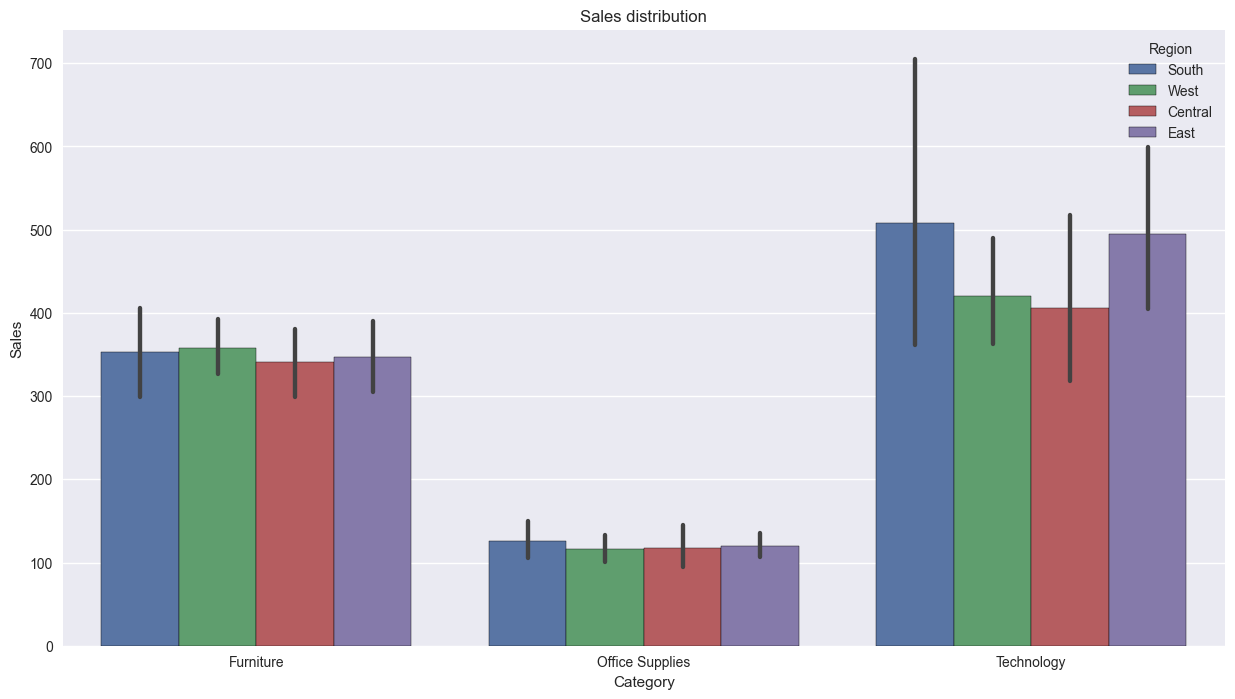

In [63]:
plt.figure(figsize=(15,8))
sns.barplot(superstore,x='Category',y='Sales',hue='Region',edgecolor='black')
plt.title('Sales distribution')

Shipping method distribution

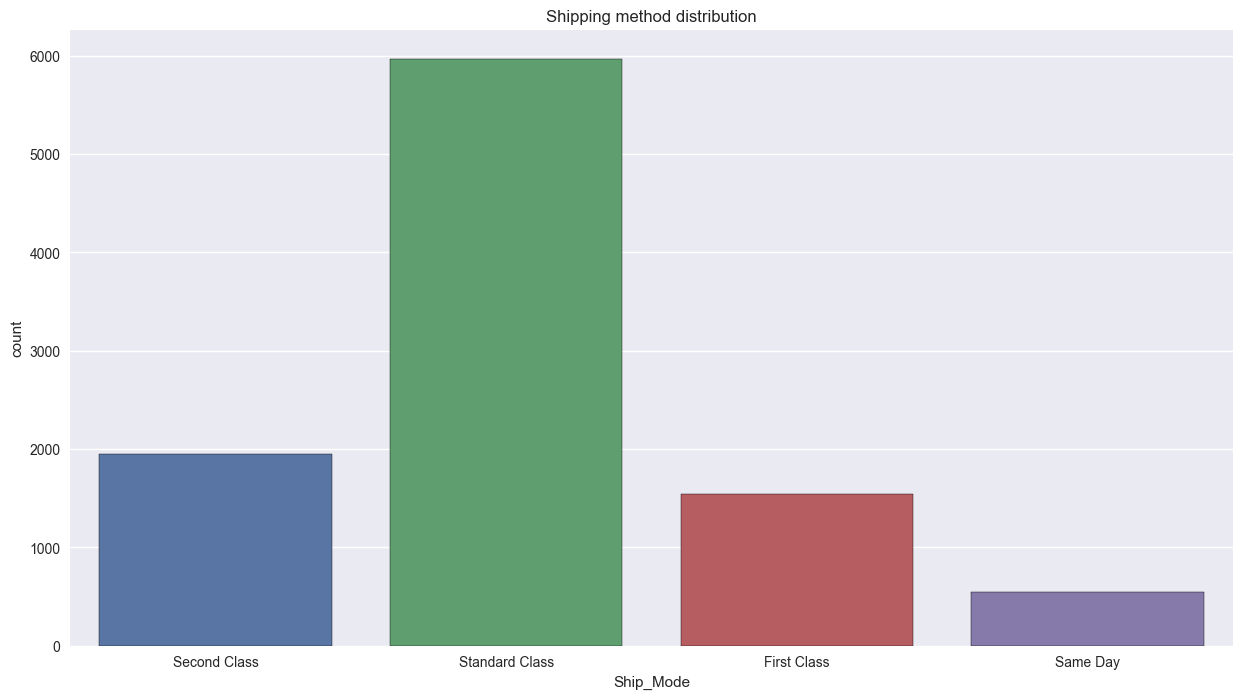

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(superstore,x='Ship_Mode',edgecolor='black')
plt.title('Shipping method distribution')
plt.show()

Let's encode labels to look for key attributes impacting sales.

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of original df
superstore_encoded = superstore.copy()

# Create LabelEncoder
label_encoder = LabelEncoder()

# Encoding every 'object' attributes for corr()
for col in superstore_encoded.columns:
    if superstore_encoded[col].dtype == 'object':  # Vérifiez si la colonne est catégorielle
        superstore_encoded[col] = label_encoder.fit_transform(superstore_encoded[col])

In [94]:
heat = superstore_encoded.corr('spearman')

<Axes: >

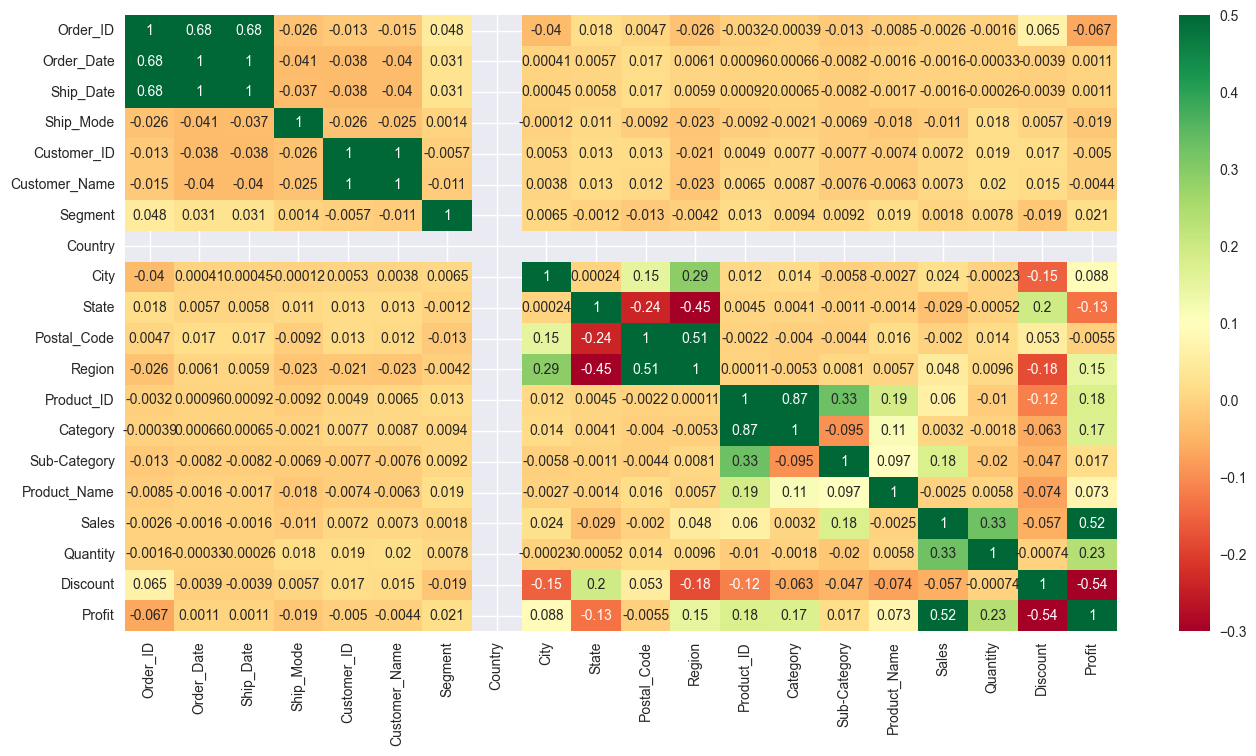

In [95]:
plt.figure(figsize=(16,8))
sns.heatmap(heat,annot=True,cmap='RdYlGn',vmax=0.5,vmin=-0.3)

By those values, we can already see that the sales is slightly impacted by the Sub-Category (corrolation coefficient of 0.18 between Sales and Sub-Category)

Moreover, we can see that the discount is impacted by the region (corrolation factor of -0.18) and the state (corrolation factor of 0.2)

Finally, we can see that the profit is logically impacted by the sales and quantity but is also impacted by the category (corrolation factor of 0.17), the product ID (corrolation factor of 0.18) and the Region (corrolation factor of 0.15)

Sales and Sub-Category:
The analysis has revealed a positive correlation between sales and sub-category, indicating that the type of products within these sub-categories may impact sales. This suggests the need for a closer examination of sub-category performance to understand which product types contribute most to sales.

Text(0.5, 1.0, 'Total sales by Sub-Category')

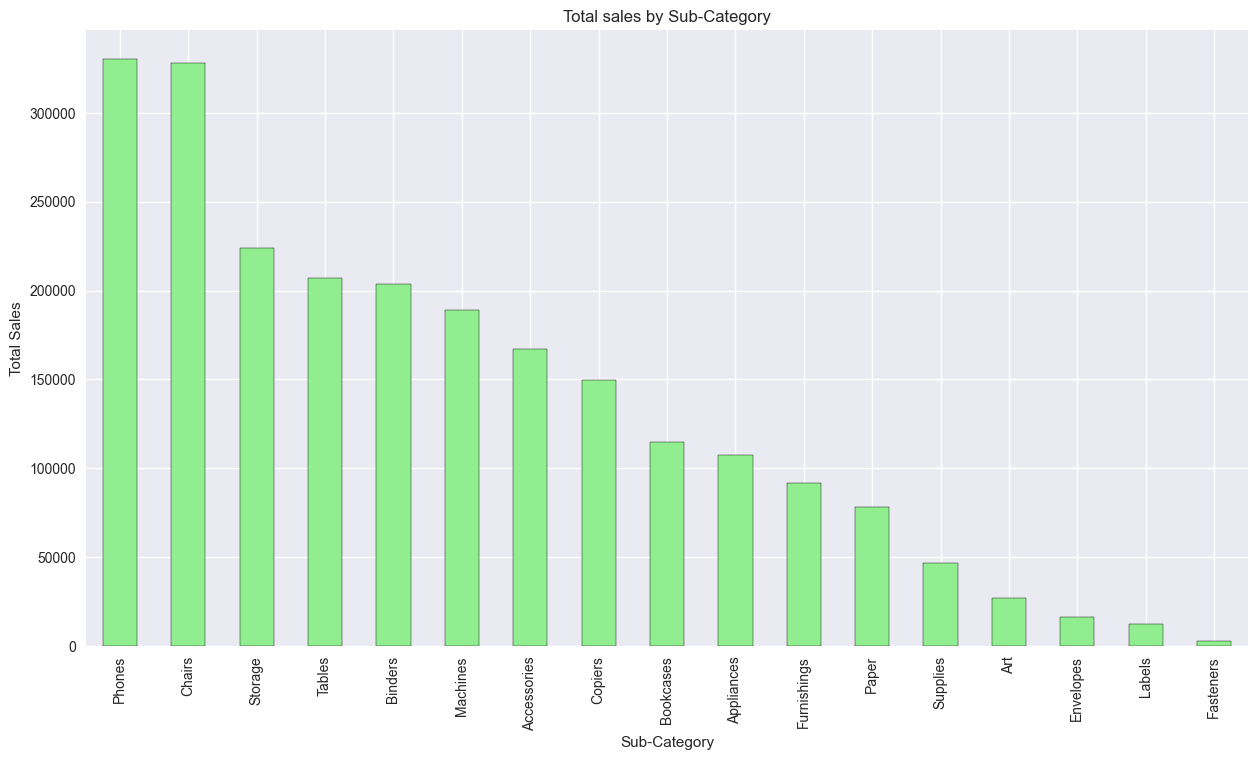

In [111]:
plt.figure(figsize=(15,8))
superstore.groupby('Sub-Category').Sales.sum().sort_values(ascending=False).plot(kind='bar',color='lightgreen',edgecolor='black')
plt.ylabel('Total Sales')
plt.title('Total sales by Sub-Category')

__Phones and chairs impact the sales the most__

Discounts and Geography (Region/State):
Discounts exhibit sensitivity to geographical factors. The negative correlation with region and positive correlation with state highlight the need to adapt discounting strategies based on the location. Further investigation can help pinpoint regional variations in discount effectiveness.


Text(0.5, 1.0, 'Average discount by region')

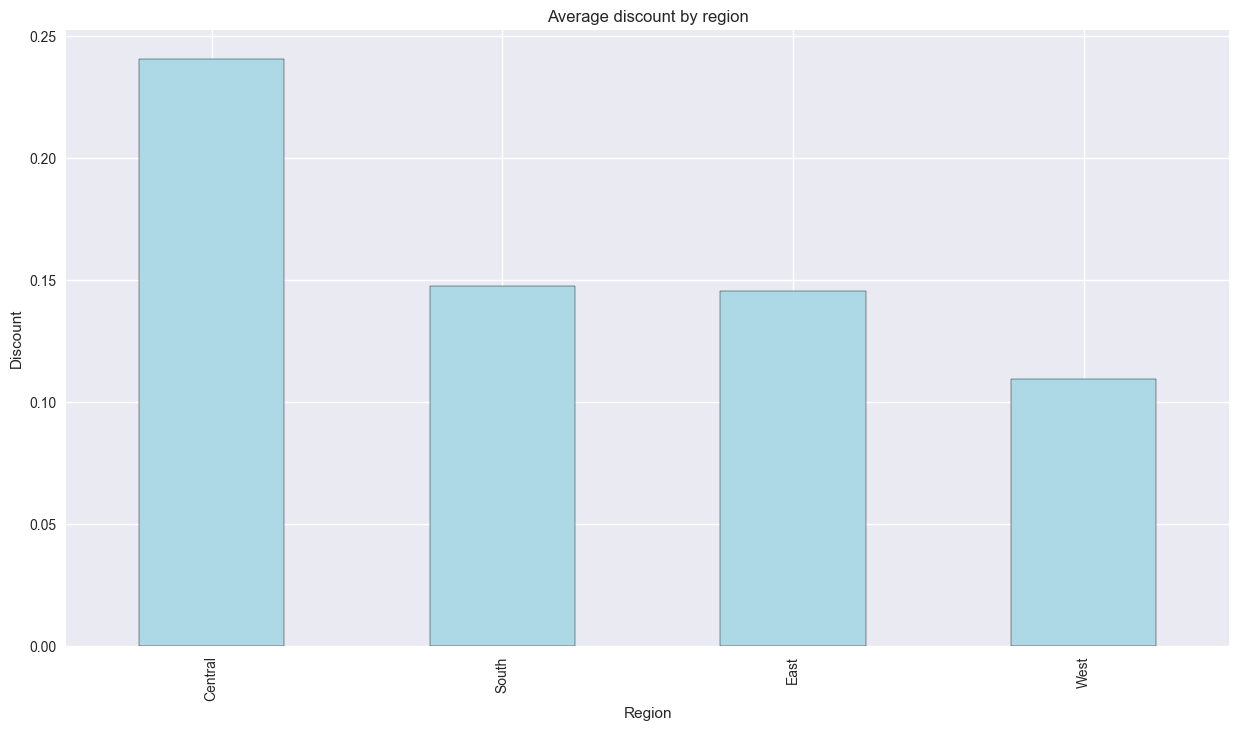

In [108]:
plt.figure(figsize=(15,8))
superstore.groupby('Region').Discount.mean().sort_values(ascending=False).plot(kind='bar',color='lightblue',edgecolor='black')
plt.ylabel('Discount')
plt.title('Average discount by region')

__Central region seems to be the most efficient__


Profit Determinants:
Profits are influenced by a combination of factors. While sales and quantity are intuitive drivers of profit, the dataset suggests that category, product ID, and region also play a role. This underscores the importance of product category choices, specific products, and the influence of regional dynamics on overall profitability.